## Working:
    |- Applying classifiers on "Titanic Dataset"
    |- Train model on "Titanic Dataset"
    |- Increase accuracy upto 70%

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


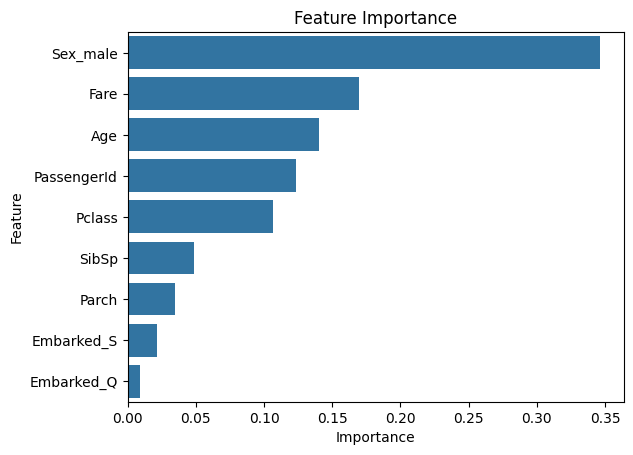

Submission file saved as 'submission.csv'


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [27]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

#  Make a function to Load dataset.
def load_data(filepath):
    return pd.read_csv(filepath)
# Explore Data
def explore_data(data):
  # First some rows.
    print(data.head())
  # Summary of dataset
    print(data.info())
  # Statistics Summary.
    print(data.describe())

# Clean Data
def clean_data(data, is_train=True, train_columns=None):
  # Fill missing values --> in Age.
    data['Age'] = data['Age'].fillna(data["Age"].median())
  # Fill missing values --> in Embarked.
    data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])
  # Fill missing values --> in Fare.
    data['Fare'] = data['Fare'].fillna(data['Fare'].median())
  # Convert categorical variable into dummy.
    data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)
    if not is_train:
      # Check that test_data and train_data have same col.
        missing_cols = set(train_columns) - set(data.columns)
        for col in missing_cols:
            data[col] = 0
        data = data[train_columns]
    return data

# Function for plot.
def plot_feature_importance(model, features):
    feature_importances = pd.DataFrame({'Feature': features, 'Importance': model.feature_importances_}).sort_values(by='Importance', ascending=False)
    sns.barplot(x='Importance', y='Feature', data=feature_importances)
    plt.title('Feature Importance')
    plt.show()

# Train Models
def train_models(X_train, y_train):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)

    # Train Logistic Regression
    log_model = LogisticRegression(solver='liblinear')
    log_model.fit(X_train_scaled, y_train)

    # Train Random Forest
    rf_model = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=42)
    rf_model.fit(X_train, y_train)

    # Train Gradient Boosting
    gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
    gb_model.fit(X_train, y_train)

    return log_model, rf_model, gb_model, scaler

# Evaluate Models
def evaluate_model(model, scaler, X_test, y_test, model_name):
   # Scale test data
    X_test_scaled = scaler.transform(X_test)
   # Make pred. on data_set
    y_pred = model.predict(X_test_scaled)
   # Printmodel evaluation Martices
    print(f"\n{model_name} Model Evaluation:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=1))
   # retrun y pred
    return y_pred

# Main Function
def main():
  # Data set path
    train_filepath = '/content/drive/MyDrive/Titanic_increase_Accuuracy/Titanic-Dataset.csv'
    test_filepath = '/content/drive/MyDrive/Titanic_increase_Accuuracy/Titanic-Dataset.csv'

    # Load / clean train data
    train_data = load_data(train_filepath)
    explore_data(train_data)
    # Clean train data
    train_data_cleaned = clean_data(train_data)
    # Save train columns for alignment
    train_columns = train_data_cleaned.drop(columns='Survived').columns

    # Separate features and target
    X = train_data_cleaned.drop(columns=['Survived', 'Name', 'Ticket', 'Cabin'])
    y = train_data_cleaned['Survived']

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train models
    log_model, rf_model, gb_model, scaler = train_models(X_train, y_train)

    # Evaluate models
    evaluate_model(log_model, scaler, X_test, y_test, "Logistic Regression")
    evaluate_model(rf_model, scaler, X_test, y_test, "Random Forest")
    evaluate_model(gb_model, scaler, X_test, y_test, "Gradient Boosting")

    # Plot feature importance for Random Forest
    plot_feature_importance(rf_model, X.columns)

    # Load and clean test data
    test_data = load_data(test_filepath)
    test_data_cleaned = clean_data(test_data, is_train=False, train_columns=train_columns)
    test_passenger_ids = test_data['PassengerId']

    # Exclude non-numeric columns
    test_data_cleaned = test_data_cleaned.drop(columns=['Name', 'Ticket', 'Cabin'])

    # Scale test data
    test_data_cleaned_scaled = scaler.transform(test_data_cleaned)

    # Predict on test data
    test_predictions = rf_model.predict(test_data_cleaned_scaled)

    # Save submission
    submission = pd.DataFrame({
        'PassengerId': test_passenger_ids,
        'Survived': test_predictions
    })
    submission.to_csv('submission.csv', index=False)
    print("Submission file saved as 'submission.csv'")

# Run the main function
if __name__ == "__main__":
    main()
